In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
%matplotlib inline
import torch
import torch.optim as optim
import datetime

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
file_path = 'D:/UNCC/UNCC ML/Project/new.csv'
data = pd.DataFrame(pd.read_csv(file_path))
print("Data shape: ", data.shape)
data.head(2)

Data shape:  (2888, 21)


,Unnamed: 0,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Kilotons of Co2,Metric Tons Per Capita,Population Growth Rate
0,3,1.0,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.92135,...,1.2,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,1030.0,0.04,4.321560
1,4,1.0,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.02128,...,1.4,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,1220.0,0.05,4.668344


In [4]:
data.dtypes.value_counts()

float64    20
int64       1
Name: count, dtype: int64

In [5]:
data = data.astype(np.float32)
data.dtypes.value_counts()

float32    21
Name: count, dtype: int64

In [6]:
Y = data.pop("Kilotons of Co2")
print("Output data shape:", Y.dtype)
print("Y Train type: ", type(Y))
Y.head(2)

Output data shape: float32
Y Train type:  <class 'pandas.core.series.Series'>


0    1030.0
1    1220.0
Name: Kilotons of Co2, dtype: float32

In [7]:
X = data
print("Input data shape:", X.shape)
print("YTrain type: ", type(X))
X.head(2)

Input data shape: (2888, 20)
YTrain type:  <class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Metric Tons Per Capita,Population Growth Rate
0,3.0,1.0,2004.0,20.064968,10.9,44.240002,0.33,0.0,0.56,62.921349,204.231247,1.2,1.414118,211.382080,60.0,652230.0,33.93911,67.709953,0.04,4.321559
1,4.0,1.0,2003.0,14.738506,9.5,36.660000,0.31,0.0,0.63,67.021278,229.968216,1.4,8.832278,190.683807,60.0,652230.0,33.93911,67.709953,0.05,4.668344


In [8]:
X = X.to_numpy()
Y = Y.to_numpy()
print("X type: ", type(X))
print("Y type: ", type(Y))

X type:  <class 'numpy.ndarray'>
Y type:  <class 'numpy.ndarray'>


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [10]:
print("Test data shape:", x_test.shape)
print("Train data shape:", x_train.shape)
print("X Train type: ", type(x_train))
print("Y Train type: ", type(y_train))
print("X Test type: ", type(x_test))
print("Y Test type: ", type(y_test))

Test data shape: (578, 20)
Train data shape: (2310, 20)
X Train type:  <class 'numpy.ndarray'>
Y Train type:  <class 'numpy.ndarray'>
X Test type:  <class 'numpy.ndarray'>
Y Test type:  <class 'numpy.ndarray'>


In [11]:
# Using .to_numpy() to convert df to numpy. Then .from_numpy to convert numpy to tensor
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train).reshape(-1,1)
y_test = torch.from_numpy(y_test).reshape(-1,1)

In [12]:
print("X Train data shape:", x_train.shape)
print("X Test data shape:", x_test.shape)
print("Y Train data shape:", y_train.shape)
print("Y Test data shape:", y_test.shape)


print("X Train data type:", x_train.dtype)
print("X Test data type:", x_test.dtype)
print("Y Train data type:", y_train.dtype)
print("Y Test data type:", y_test.dtype)

X Train data shape: torch.Size([2310, 20])
X Test data shape: torch.Size([578, 20])
Y Train data shape: torch.Size([2310, 1])
Y Test data shape: torch.Size([578, 1])
X Train data type: torch.float32
X Test data type: torch.float32
Y Train data type: torch.float32
Y Test data type: torch.float32


In [13]:
#Define a neural network with 3 hidden layers and 1 output layer
#Hidden Layers will have 128 and 256 neurons
#Output layers will have 1 neuron
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(2020)
        self.fc1 = nn.Linear(20, 128) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 256)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(256, 1)
    def forward(self, x):
        op = self.fc1(x)
        op = self.relu1(op)
        op = self.fc2(op)
        op = self.relu2(op)
        y = self.out(op)
        return y

In [14]:
    #Define function for training a network
    def train_network(model,optimizer,loss_function,num_epochs,batch_size,X_train,Y_train):
    #Explicitly start model training
        model.train()
        loss_across_epochs = []
        print(f'Starting Time: {datetime.datetime.now()}')
        for epoch in range(num_epochs):
            train_loss= 0.0
            for i in range(0,X_train.shape[0],batch_size):
                #Extract train batch from X and Y
                input_data = X_train[i:min(X_train.shape[0],i+batch_size)]
                labels = Y_train[i:min(X_train.shape[0],i+batch_size)]
                #set the gradients to zero before starting to do backpropragation
                optimizer.zero_grad()
                #Forward pass
                output_data = model(input_data)
                #Caculate loss
                loss = loss_function(output_data, labels)
                #Backpropogate
                loss.backward()
                #Update weights
                optimizer.step()
                train_loss += loss.item() * batch_size
            if (epoch+1)% 100==0:
                print(f"Epoch: {epoch+1} - Loss:{np.sqrt(train_loss):.4f}")
            loss_across_epochs.extend([train_loss])
        print(f'End Time: {datetime.datetime.now()}')
        #Predict
        y_test_pred = model(x_test).detach()
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
        plt.scatter(y_test, y_test_pred)
        plt.title("Neural Network: Predictions vs Ground Truths (Test Set)")
        plt.xlabel("Ground Truths")
        plt.ylabel("Preedictions")
        return(loss_across_epochs)

In [15]:
#Define epochs and batch size
num_epochs = 500
batch_size=16

Adam...
Starting Time: 2024-12-13 23:17:55.487719
Epoch: 100 - Loss:26933215.0477
Epoch: 200 - Loss:20039320.2820
Epoch: 300 - Loss:5765916.8721
Epoch: 400 - Loss:5171229.4246
Epoch: 500 - Loss:3956836.7737
End Time: 2024-12-13 23:20:02.510820


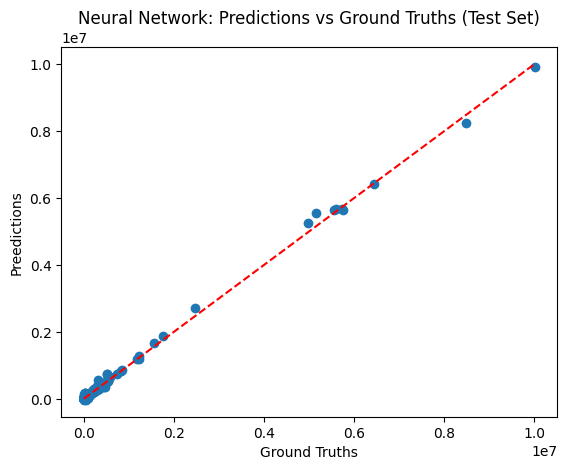

In [16]:
#Create an object of the Neural Network class
model = NeuralNetwork()
#Define loss function
loss_function = nn.MSELoss() #Mean Square Error Loss
#Define Optimizer
print("Adam...")
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001)
#Calling the function for training and pass model, optimizer, loss and related paramters
adam_loss = train_network(model,adam_optimizer,loss_function,num_epochs,batch_size,x_train,y_train)

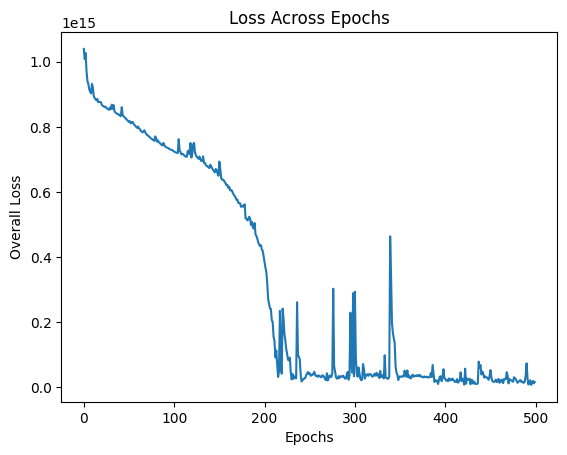

In [17]:
plt.plot(adam_loss,label="ADAM")
plt.xlabel("Epochs")
plt.ylabel("Overall Loss")
plt.title("Loss Across Epochs")
plt.show()

In [18]:
from torcheval.metrics.functional import r2_score, mean_squared_error

with torch.no_grad():  # No need to compute gradients for inference
    y_pred = model.forward(x_test)  # Get predictions from the model

# Calculate R-squared
r2 = r2_score(y_pred.view(-1), y_test.view(-1))
print("R2 Score: ", r2)

mse = mean_squared_error(y_pred.view(-1), y_test.view(-1))
print("MSE Score: ",mse) 

rms = np.sqrt(mse)
print("RMSE Score: ",rms) 

R2 Score:  tensor(0.9976)
MSE Score:  tensor(1.6954e+09)
RMSE Score:  tensor(41175.3164)
